In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold



# <center> Machine Learning Programming Exercise 5:</center> 
# <center> <ins>Supervised classification </ins></center> 

| <font size=6>Monôme / binôme</font> | <font size=6>Noms</font> | <font size=6>Prénoms</font>   |
|:-------------:     |:-----------   |:------  |
| binôme 1  | <span>ROUDAUT</span> | <span>Tanguy</span>     |
| binôme 2         | <span>DUBEE</span> | <span>Melvin</span>     | 


## 1. Objectifs


Nous allons dans ce TP classer automatiquement des patchs extraits d'images sonar (cf. figure ci-dessous) en types de fond marin (roches, sables, vases, rides de sable verticales et à 45°, [Posidonie](https://fr.wikipedia.org/wiki/Posidonia_oceanica)).

Quelques exemples de patchs d'image sonar de fond marin:

<img src="https://drive.google.com/uc?export=view&id=1cS7gN2XAYBMmcmyhUjmtQRDlL44_wERM" style="width:600px;height:400px ;" />

L'objectif est d'écrire un ou plusieurs scripts permettant de mettre en oeuvre un système basé sur différentes approches supervisées de machine learning. Ces scripts devront ainsi suivre la chaîne générale décrite en cours (à l'exception de la phase de captation; cf. figure ci-dessous ) :
* prétraitements
* extraction des descripteurs
* apprentissage d'un modèle de classement
* classement des patchs
* évaluation du classifieur appris
* comparaison et analyse des performances de différents classifieurs

<img src="https://drive.google.com/uc?export=view&id=1yz-HuFs3zn7Q_AwXflOqdFFjyEAocf1s" />

Le TP est globalement organisé de la manière suivante:

**Données**

Il s'agira d'entraîner les classifieurs à partir de descripteurs extraits grâce à un algorithme performant d'analyse de textures appelé [scattering operator](https://www.di.ens.fr/data/scattering) (le fonctionnement exact n'est pas au programme mais il s'apparente à des bancs de filtres (succession de filtres) ; à chaque niveau un ou plusieurs descripteurs sont calculés). 
 
**Prétraitements**

Aucun autre prétraitement ne sera réalisé. 

**Ensembles de données**

Les deux ensembles de données (apprentissage et test) seront composés de 2/3 et 1/3 de la base totale d'images. 

**Algorithmes** 

Concernant les algorithmes supervisés de machine learning, l'objectif est de découvrir le package python [scikit-learn](http://scikit-learn.org/stable/user_guide.html) qui vous permettra d'utiliser les algorithmes de [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).


**Travail demandé**

<span style="color:red">**Dans cet exercice, il vous est demandé de fournir un seul rapport regroupant les réponses aux questions, vos analyses et vos codes. Ce rapport pourra prendre la forme d'un jupyter notebook ou d'un pdf. Il est de plus conseillé de faire tourner les codes sur [google colab](https://colab.research.google.com/?hl=fr) si votre machine manque de puissance (dans ce cas un jupyter notebook est nécessaire). Il est également conseillé de répondre aux questions par des phrases pour obtenir la totalité des points**.</span>



## Fichiers inclus dans le starter code pour cette séance
* **seafloorClassification_data.npz** - fichier contenant les données nécessaires



# 2. Découverte de la base de patchs

## 2.1 Imports des packages python


In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# on supprime les warnings pénibles de scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# numpy
import numpy as np

# links with google drive and colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')	
  import sys
  code_folder = '/content/gdrive/My Drive/Colab Notebooks/ex06_supervised_seabedClassification/'
  sys.path.append(code_folder)
  # !ls "/content/gdrive/My Drive/Colab Notebooks/ex06_supervised_seabedClassification"
  %cd "$code_folder"
  !ls "$code_folder"
   

## 2.2 Chargement et examen des données

**Utiliser les lignes de code suivantes permettant de charger les données comprises dans le fichier __seafloorClassification_data.npz__**

In [2]:
# ---------------------------------------------------------------------------------------------------------------
# LOAD Data, Features, Labels
# ---------------------------------------------------------------------------------------------------------------

tmp = np.load('seafloorClassification_data.npz',allow_pickle=True)

image_values = tmp['image_values'] # images sonar
label_names = tmp['label_names'] # types de fond marin
feature_values = tmp['feature_values'] # features extraits avec le scaterring operator
instance_nb = tmp['instance_nb'] # nb d'images sonar
feature_nb = tmp['feature_nb'] # nb de features

##### **<ins>Question 2.2.1:</ins> Ecrire du code permettant d'afficher quelques patchs (comme la première image de ce notebook, chaque patch a une taille de 200x200)**

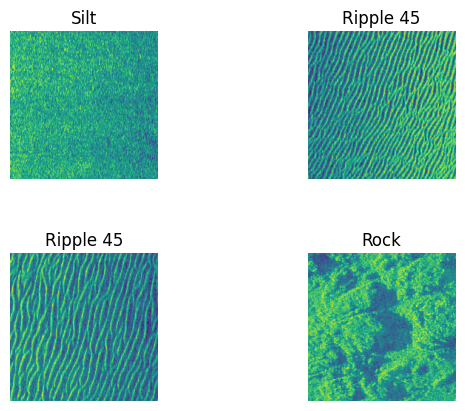

In [3]:
index = np.random.choice(len(image_values), 4, replace=False) # sélection de 4 images aléatoire dans l'ensemble de données 
images = [np.reshape(image, (200, 200)) for image in image_values[index]] # reshape des images de dimension 400000 en tableau de 200px par 200px puis stockage dans une liste
names = label_names[index] # On récupère leurs noms pour faire un affichage cohérent 

for i, img in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(names[i])
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**<ins>Question 2.2.2: </ins> Ecrire du code permettant de donner quelques statistiques de chaque descripteur extrait des images grâce au scattering operator.**

In [4]:
for n_feature in range(feature_nb):
    feature_descriptor = feature_values[:, n_feature] # il y a 4 features, donc on récupère toutes les données de chaque features

    print("Feature", n_feature, " :")
    print("\t> Mean: ", np.mean(feature_descriptor)) # calcul et affichage de la moyenne
    print("\t> Std:", np.std(feature_descriptor))  # calcul et affichage de l'écart type
    print("\t> Median:", np.median(feature_descriptor), "\n") # calcul et affichage de la median

Feature 0  :
	> Mean:  1976.764728305124
	> Std: 178.55727141093564
	> Median: 1940.9969039461025 

Feature 1  :
	> Mean:  30.605339159653763
	> Std: 9.98416952667193
	> Median: 28.211177297168398 

Feature 2  :
	> Mean:  21.486941156728236
	> Std: 13.396320735374514
	> Median: 15.359648942141654 

Feature 3  :
	> Mean:  30.876079604633407
	> Std: 11.027577810406473
	> Median: 27.61810908300077 

Feature 4  :
	> Mean:  43.39810779837543
	> Std: 10.259108518958692
	> Median: 42.35776872917822 



**<ins>Question 2.2.3: commentez ces statistiques</ins>** 

On remarque pour les trois dernières features que nous avons des valeurs proches l'une de l'autre, ce qui n'est pas le cas de la première. L'écart-type pour la feature 1 est de 178.55 et 9.98 pour la 2. 
Il est donc important de les normaliser pour la suite du tp.

## 3. Traitements

## 3.1 Normalisation des descripteurs 

**<ins>Question 3.1.1:</ins> Écrire des lignes de code permettant de [centrer et réduire](https://scikit-learn.org/stable/modules/preprocessing.html) les données si besoin. Proposez et mettez en oeuvre un procédé pour vérifier cette normalisation.**


In [5]:
# Nous avons réutiliser notre fonction de normalisation utilisées dans le TP4, la formule est la même, seulement les données change 
feature_values_norm = np.zeros((instance_nb, feature_nb))

for n_feature in range(feature_nb):
    feature_descriptor = feature_values[:, n_feature] 

    mu = np.mean(feature_descriptor, axis=0)
    feature_norm = feature_descriptor - mu

    sigma = np.std(feature_norm, axis=0, ddof=1)
    feature_values_norm[:, n_feature] = feature_norm/sigma

**<ins>Question 3.1.2</ins>: Pourquoi doit-on faire cette normalisation?**

Cela permet de mettre les données sur la même échelles, un écart trop important entre les différentes valeurs peut ammener à un possible sur-apprentissage.

## 3.2 Séparation des données en ensembles 

**<ins>Question 3.2.1:</ins> Écrire des lignes de code permettant de [créer deux ensembles](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split): un pour l'apprentissage et un pour le test en proportions 2/3-1/3.**


In [6]:
# la doc scikit-learn nous aide à réaliser deux ensembles, à partir des données de l'énoncé. Cette fonction retourne les deux ensembles (image, label, feature) en respectant les proportions données en argument
image_train, image_test, label_train, label_test, feature_train, feature_test = train_test_split(image_values, label_names, feature_values, test_size=0.33, random_state=42) 

**<ins>Question 3.2.2:</ins> Pourquoi doit-on faire cela?**

Pour entrainer et évaluer un modèle de prédiction, notre jeu de données est découpé en trois groupes:
- Training set: Données utilisées pour entrainer notre modèle.
- Validation set: Données utilisées pour ajuster les hyper-paramètres de notre modèle.
- Test set: Données inconnues par le modèle et utilisées pour l'évaluer. Il est très important pour mettre à l'épreuve notre modèle 

### 3.3 Gestion des labels

**<ins>Question 3.2.3:</ins> Écrire des lignes de code permettant de disposer des labels pour chaque ensemble de données dans différents [codages](https://scikit-learn.org/stable/modules/preprocessing_targets.html) (noms vers indices, indices vers [one-hot-encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), noms vers one-hot-encoding).**


In [7]:
# Cette première partie permet de renomer nos différent label sous forme numérique, par exemple Posidonia sera 0 et Ripple verticale 1 sous forme
# de tableau [0, 5, 2, ..., 1, 0]
label_encoder = LabelEncoder()
label_indice_train = label_encoder.fit_transform(label_train)
label_indice_test = label_encoder.transform(label_test)


# Cette seconde classe permet d'encoder les labels des différents ensembles en one-hot. Par exemple précedement nous avions 3 ici ce sera [0. 0. 1. 0. 0. 0.]
one_hot_encoder = OneHotEncoder(sparse=False)
label_one_hot_train = one_hot_encoder.fit_transform(label_train.reshape(-1, 1))
label_one_hot_test = one_hot_encoder.transform(label_test.reshape(-1, 1))
indice_one_hot_train = one_hot_encoder.fit_transform(label_indice_train.reshape(-1, 1))
indice_one_hot_test = one_hot_encoder.transform(label_indice_test.reshape(-1, 1))

**<ins>Question 3.2.4:</ins> Etudiez la répartition du nombre de données (d'images) pour chaque <ins>type de fonds marins et pour chaque ensemble de données</ins>. Est-ce important? Pourquoi?**

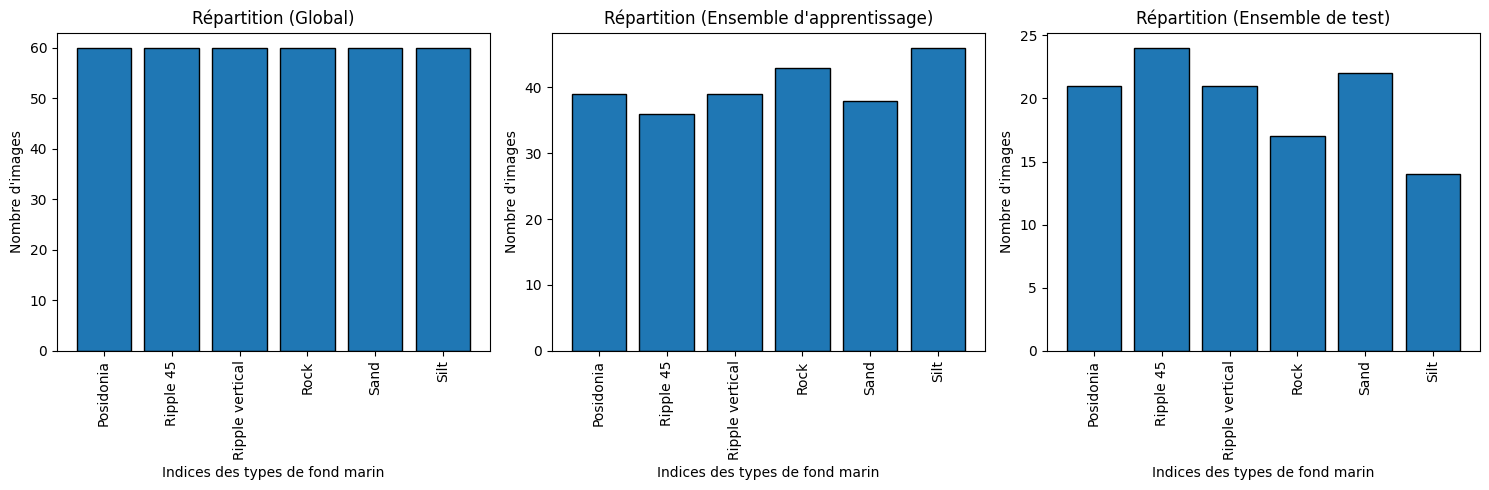

In [8]:
# cette portion de code est utile pour afficher les noms des répartitions 
# elle n'a aucun intérêt dans autre que l'affichage
label_encoder = LabelEncoder() 
label_indice_name = label_encoder.fit_transform(label_names) # réutilisation de la fonction précédente

# Récupération des noms des différents sol.
classes = np.arange(len(set(label_indice_name)))
classe_name = [label_names[np.where(label_indice_name == 0)][0], \
               label_names[np.where(label_indice_name == 1)][0], \
               label_names[np.where(label_indice_name == 2)][0], \
               label_names[np.where(label_indice_name == 3)][0], \
               label_names[np.where(label_indice_name == 4)][0], \
               label_names[np.where(label_indice_name == 5)][0]]
# fin de la portion                

# Liste des élements à afficher depuis la boucle
label_indice = [label_indice_name, label_indice_train, label_indice_test]
label_ensemble_type = ["Global", "Ensemble d'apprentissage", "Ensemble de test"]

plt.figure(figsize=(15, 5))
for i, label in enumerate(label_indice): # Un subplot par sous graphique "Global", "Ensemble d'apprentissage", "Ensemble de test"
    plt.subplot(1, 3, i+1)
    plt.bar(classes, np.bincount(label), edgecolor='black', align='center')
    plt.xticks(classes, classe_name, rotation='vertical') 
    plt.xlabel('Indices des types de fond marin')
    plt.ylabel('Nombre d\'images')
    plt.title('Répartition (%s)' % (label_ensemble_type[i]))

plt.tight_layout()

Dans notre modèle, il est important que chacun des types de fonds marins soient bien représentés puisqu'un type avec moins d'image qu'un autre pourrait faire varier à la baisse la performance de notre modèle. En effet, un type serait moins bien réprésenté, s'il a moins d'image. De plus, il se pourrait que si les types de fonds sont mal représentés, par exemple avec un type avec "trop" d'images, il y ai alors un sur-apprentissage alors qu'avec un type avec peu d'images, il y ai un sous-apprentissage. 


## 4. Approche supervisée à partir des descripteurs du scattering operator

## 4.1 Apprentissage des classifieurs


**<ins>Question 4.1.1:</ins> Faire la liste expliquée des hyper-paramètres (paramètre uniquement lié à l'algorithme d'apprentissage) les plus importants des algorithmes: [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).Vous vous concentrerez sur les hyperparamètres que nous avons rencontré précédemment (cours et TPs).**

##### Régression Logistique:

```python 
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, class_weight=None)
```

- **penalty**: La norme utilisée pour la pénalisation ('l1', 'l2', 'elasticnet', 'none').
- **C**: Inverse de la force de régularisation; valeurs plus faibles spécifient une régularisation plus forte.
- **solver**: L'algorithme utilisé dans l'optimisation ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').
- **max_iter**: Le nombre maximum d'itérations pour l'optimisation.
- **class_weight**: Spécifie le poids relatif des classes pour l'entraînement déséquilibré.

##### Réseaux de Neurones (Multi-layer Perceptron):

```python 
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, 
                      learning_rate='constant', learning_rate_init=0.001, max_iter=200)
```

- **hidden_layer_sizes**: La taille des couches cachées.
- **activation**: La fonction d'activation utilisée ('identity', 'logistic', 'tanh', 'relu').
- **solver**: L'optimiseur pour la minimisation de la perte ('lbfgs', 'sgd', 'adam').
- **alpha**: Terme de régularisation pour les poids.
- **learning_rate**: Taux d'apprentissage pour les mises à jour de poids ('constant', 'invscaling', 'adaptive').
- **learning_rate_init**: Taux d'apprentissage initial utilisé. C'est la taille de pas dans la mise à jour des poids.
- **max_iter**: Le nombre maximum d'itérations pour l'optimisation.

##### Random Forests:

```python 
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                               min_samples_split=2, min_samples_leaf=1)
```

- **n_estimators**: Le nombre d'arbres dans la forêt.
- **max_features**: Le nombre de caractéristiques à considérer pour la meilleure division à chaque nœud.
- **max_depth**: La profondeur maximale de chaque arbre dans la forêt.
- **min_samples_split**: Le nombre minimum d'échantillons requis pour diviser un nœud interne.
- **min_samples_leaf**: Le nombre minimum d'échantillons requis pour être à un nœud feuille.

##### Support Vector Machines (SVM):

```python 
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', class_weight=None)
```

- **C**: Paramètre de régularisation pour contrôler le coût des erreurs.
- **kernel**: Le noyau utilisé pour la transformation de l'espace ('linear', 'poly', 'rbf', 'sigmoid').
- **degree**: Degré du noyau polynomial (utilisé avec le noyau polynomial).
- **gamma**: Coefficient du noyau ('scale', 'auto' ou un nombre flottant).
- **class_weight**: Spécifie le poids relatif des classes pour l'entraînement déséquilibré.



**<ins>Question 4.1.2</ins>: Réalisez l'apprentissage successif des modèles: régression logistique, réseaux de neurones, svm et random forest en utilisant les fonctions du package scikit-learn. Les valeurs des hyper-paramètres seront choisis comme les valeurs par défaut de scikit-learn.**

In [9]:
logistic_regression_model = LogisticRegression() # Création de notre modéle de régression logistique avec les valeurs par défauts (on ne rempli rien)
logistic_regression_model.fit(feature_train, label_train) # Apprentissage avec notre ensemble "train"

mlp_model = MLPClassifier() # Création de notre modéle de réseau de neuronne
mlp_model.fit(feature_train, label_train) # Apprentissage avec notre ensemble "train"

svm_model = SVC() # Création de notre modéle de support vector machines
svm_model.fit(feature_train, label_train) # Apprentissage avec notre ensemble "train"

random_forest_model = RandomForestClassifier() # Création de notre modéle de random forests
random_forest_model.fit(feature_train, label_train) # Apprentissage avec notre ensemble "train"

RandomForestClassifier()

**<ins>Question 4.1.3</ins>: A l'aide des fonctions fournies, évaluer les modèles appris avec la procédure d'évaluation des performances pour les grands jeux de données en calculant et en affichant la matrice de confusion, puis les [métriques extraites de cette matrice](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Commenter.**

In [10]:
# Pour réaliser nos prédictions nous allons utilisés notre ensemble de test, notre model n'a pas encore rencontré cette ensemble, 
# on le test donc dans des conditions réel
logistic_regression_predictions = logistic_regression_model.predict(feature_test) # réalisation de la prédiction grâce à notre modèle de régression logistique 
print("Matrice de Confusion - Régression Logistique :")
print(confusion_matrix(label_test, logistic_regression_predictions)) # affichage de la matrice de confusion
print("\nRapport de Classification - Régression Logistique :")
print(classification_report(label_test, logistic_regression_predictions)) # affichage des performences de nos prédictions

mlp_predictions = mlp_model.predict(feature_test)# réalisation de la prédiction grâce à notre modèle de réseau de neuronne
print("\nMatrice de Confusion - Réseaux de Neurones :")
print(confusion_matrix(label_test, mlp_predictions))
print("\nRapport de Classification - Réseaux de Neurones :")
print(classification_report(label_test, mlp_predictions))

svm_predictions = svm_model.predict(feature_test)# réalisation de la prédiction grâce à notre modèle de support vector machines
print("\nMatrice de Confusion - SVM :")
print(confusion_matrix(label_test, svm_predictions))
print("\nRapport de Classification - SVM :")
print(classification_report(label_test, svm_predictions))

random_forest_predictions = random_forest_model.predict(feature_test)# réalisation de la prédiction grâce à notre modèle de random forests
print("\nMatrice de Confusion - Random Forest :")
print(confusion_matrix(label_test, random_forest_predictions))
print("\nRapport de Classification - Random Forest :")
print(classification_report(label_test, random_forest_predictions))


Matrice de Confusion - Régression Logistique :
[[15  4  0  0  0  2]
 [ 2 14  2  0  4  2]
 [ 1  0 17  0  1  2]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 21  1]
 [ 4  0  0  0  0 10]]

Rapport de Classification - Régression Logistique :
                 precision    recall  f1-score   support

      Posidonia       0.68      0.71      0.70        21
      Ripple 45       0.78      0.58      0.67        24
Ripple vertical       0.89      0.81      0.85        21
           Rock       1.00      1.00      1.00        17
           Sand       0.81      0.95      0.88        22
           Silt       0.59      0.71      0.65        14

       accuracy                           0.79       119
      macro avg       0.79      0.80      0.79       119
   weighted avg       0.80      0.79      0.79       119


Matrice de Confusion - Réseaux de Neurones :
[[ 1  0 15  0  5  0]
 [ 7  0  5  0 12  0]
 [ 0  0 20  0  1  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  2  0 12  0]]

Rapport de Classification 

L'évaluation des performances nous montre que le modèle de régression logistique est bien optimisé pour les types Rock (1.00), Ripple vertical (0.89) et Sand (0.81) au vu de leur précision. Le score F1 nous indique si d'un point de vue général, le modèle est satisfaisant. Ici, avec un accuracy, un macro average et weighted average de 0.79 on peut en déduire que le modèle est optimum pour la plupart des classes. 

Pour le réseaux de neurones, c'est moins le cas, on a des résultats très bas au niveau de F1, ce qui montre que ce modèle est moins performant que la régression logistique. 

Le modèle SVM, comme le modèle précédent a de faible performances, la plupart des classes ne sont pas correctement prédites, d'où une précision faible. 

Pour finir, très certainement le meilleur modèle, Random_Forest avec 97% de précision, 98% de précision de moyenne pondéréé, 98% de rappel et 98% de score F1. Les performances de ce modèle sont robustes au vu de la valeur de F1 pour chacunes des classes. 

Comme indiqué dans la documentation, les métriques utilisés pour chaque classe nous permettent d'avoir la moyenne des faux positifs (accuracy), la moyenne non pondérée par étiquette (macro avg), la moyenne pondérée par support par étiquette (weighted avg). 

## 4.2 Première évaluation (biaisée) des classifieurs

**<ins>Question 4.2.1</ins>: Le jeu de données étant petit, la procédure précédente n'est pas adaptée. Vous évaluerez les performances par [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html\#computing-cross-validated-metrics) et reporterez la moyenne et l'écart-type de la métrique `accuracy`. Commenter**

In [11]:
# Calcul de la cross-validation à l'aide de la fonction scikit-learn puis affichage de la moyenne et de l'écart type du scores obtenus pour chaque modèle 

logistic_regression_scores = cross_val_score(logistic_regression_model, feature_test, label_test, scoring='accuracy')
print("Régression Logistique - Accuracy: Mean =", logistic_regression_scores.mean(), ", Std =", logistic_regression_scores.std())

mlp_scores = cross_val_score(mlp_model, feature_test, label_test, scoring='accuracy')
print("Réseaux de Neurones - Accuracy: Mean =", mlp_scores.mean(), ", Std =", mlp_scores.std())

svm_scores = cross_val_score(svm_model, feature_test, label_test, scoring='accuracy')
print("SVM - Accuracy: Mean =", svm_scores.mean(), ", Std =", svm_scores.std())

random_forest_scores = cross_val_score(random_forest_model, feature_test, label_test, scoring='accuracy')
print("Random Forest - Accuracy: Mean =", random_forest_scores.mean(), ", Std =", random_forest_scores.std())

Régression Logistique - Accuracy: Mean = 0.7648550724637682 , Std = 0.04921938423100165
Réseaux de Neurones - Accuracy: Mean = 0.21050724637681156 , Std = 0.06059938311727684
SVM - Accuracy: Mean = 0.21811594202898554 , Std = 0.0391170132645385
Random Forest - Accuracy: Mean = 0.8913043478260869 , Std = 0.04951985380657937


La cross-validation nous permet ici d'évaluer les performances de chacun de nos modèles. Mais cette fois-ci on ne créé pas seulement deux ensembles (test/entraînement) mais plein de sous-ensembles. Ce qui nous permet d'évaluer les performances en prenant à chaque itérations faite dans la fonction de *cross_val_score*, un sous-ensemble comme ensemble de test et les autres comme ensemble d'entraînement. En testant toutes les combinaisons nécessaires, on obtient une moyenne de chaque métriques et ici en l'occurence du métrique *accuracy*. 

Ce que l'on peut dire des résultats obtenus est que les moyennes de précision de chaque classe se classent dans le même ordre. En effet, le modèle Random Forest reste le plus performant, son écart-type confirme même cette observation. Pour les autres modèles, cela ne change pas pour la régression logistique, tandis que les réseaux de neurones et le SVM obtiennent des résultats nettement à la hausse. 

Dans notre cas, on peut conclure sur l'efficacité du cross-validation pour choisir le modèle le plus performant mais également pour améliorer l'efficacité des modèles peu performants. 


## 4.3 Optimisation des hyper-paramètres du modèle

Le jeu de données étant très petit, la valeur des hyper-paramètres doit être fixée de manière optimale en évaluant les modèles par cross validation sur l'ensemble de training.

**<ins>Question 4.3.1</ins>:** Lisez le [tutoriel suivant](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) en faisant particulièrement attention à la façon dont est gérée la détermination des hyperparamètres et l'évaluation des performances. Reproduisez cette méthodologie en testant différents nombres de plis (fold):
* pour la **<ins>Régression logistique:</ins>**:
    * C: 0.001, 0.01,0.1,1,10
    * penalty = 'l1', 'l2', 'elasticnet', 'None'
    
* pour le **<ins>réseau de neurones</ins>:**
    * hidden_layer_sizes: une couche de 100 neurones, 2 couches de 100 neurones, 3 couches de 100 neurones
    * activation: 'logistic', 'tanh', 'relu'
    * alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10

* pour le **<ins>Random Forest</ins>:**
    * n_estimators: 1, 10, 100, 500, 1000
    * max_depth: 5, 10, 20
    * min_samples_leaf: 1, 5, 10

* pour le **<ins>SVM</ins>:**
    * kernel: 'rbf' 
    * C: 1e3, 5e3, 1e4, 5e4, 1e5, 1e6
    * gamma: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5


N'hésitez pas à fixer le paramètre `verbose` pour comprendre ce qui est fait.

In [17]:
# Le code est le même que pour la question 4.1.2 et 4.1.3, mais cette fois si nous calcullons nos modèle avec les meilleurs hyperparamètres obtenus précédement

model_logistic_regression = LogisticRegression(**best_params_logistic_regression)
model_logistic_regression.fit(feature_train, label_train)
predictions_logistic_regression = model_logistic_regression.predict(feature_test)
report_logistic_regression = classification_report(label_test, predictions_logistic_regression)
print("Régression Logistique; Performances :\n", report_logistic_regression)

print("\n==================================================\n\n")

model_mlp = MLPClassifier(**best_params_mlp)
model_mlp.fit(feature_train, label_train)
predictions_mlp = model_mlp.predict(feature_test)
report_mlp = classification_report(label_test, predictions_mlp)
print("Réseaux de Neurones; Performances :\n", report_mlp)

print("\n==================================================\n\n")

model_random_forest = RandomForestClassifier(**best_params_random_forest)
model_random_forest.fit(feature_train, label_train)
predictions_random_forest = model_random_forest.predict(feature_test)
report_random_forest = classification_report(label_test, predictions_random_forest)
print("Random Forest; Performances :\n", report_random_forest)

print("\n==================================================\n\n")

model_svm = SVC(**best_params_svm)
model_svm.fit(feature_train, label_train)
predictions_svm = model_svm.predict(feature_test)
report_svm = classification_report(label_test, predictions_svm)
print("SVM; Performances :\n", report_svm)
         

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/melvindubee/Repository/depot-ensta-python/machine_learning/tp5/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/melvindubee/Repository/depot-ensta-python/machine_learning/tp5/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

Réseaux de Neurones; Performances :
                  precision    recall  f1-score   support

      Posidonia       0.67      0.48      0.56        21
      Ripple 45       0.79      0.46      0.58        24
Ripple vertical       0.84      0.76      0.80        21
           Rock       1.00      1.00      1.00        17
           Sand       0.75      0.95      0.84        22
           Silt       0.50      0.93      0.65        14

       accuracy                           0.74       119
      macro avg       0.76      0.76      0.74       119
   weighted avg       0.77      0.74      0.73       119




Random Forest; Performances :
                  precision    recall  f1-score   support

      Posidonia       0.95      1.00      0.98        21
      Ripple 45       1.00      0.92      0.96        24
Ripple vertical       1.00      0.95      0.98        21
           Rock       1.00      1.00      1.00        17
           Sand       0.92      1.00      0.96        22
           Si

## 4.4 Evaluation optimale pour les petits jeux de données

**<ins>Question 4.4.1</ins>: Les performances espérées par le modèle final sont biaisées car nous avons un petit jeu de données et nous avons évaluées les performances sur des données vues lors de l'apprentissage ou pour fixer les hyperparamètres. La procédure adaptée pour évaluer proprement les performances dans ce cas se nomme validations croisées imbriquées. Le tutoriel [Nested Cross-Validation for Machine Learning with Python](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/) décrit cette procédure. Evaluer les performances pour une validation croisée extérieure (outer) de 4 et intérieure (inner) de 3**.


In [15]:
param_grid_logistic_regression = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}
grid_search_logistic_regression = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_logistic_regression, cv=5, verbose=1, n_jobs=-1)
grid_search_logistic_regression.fit(feature_values, label_names)


param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid_mlp, cv=5, verbose=1, n_jobs=-1)
grid_search_mlp.fit(feature_values, label_names)


param_grid_random_forest = {
    'n_estimators': [1, 10, 100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_random_forest, cv=5, verbose=1, n_jobs=-1)
grid_search_random_forest.fit(feature_values, label_names)


param_grid_svm = {
    'kernel': ['rbf'],
    'C': [1e3, 5e3, 1e4, 5e4, 1e5, 1e6],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5]
}
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=5, verbose=1, n_jobs=-1)
grid_search_svm.fit(feature_values, label_names)

/Users/melvindubee/Repository/depot-ensta-python/machine_learning/tp5/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/melvindubee/Repository/depot-ensta-python/machine_learning/tp5/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/melvindubee/Repository/depot-ensta-python/machine_learning/tp5/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/melvindubee/Repository/depot-ensta-python/machine_learning/tp5/venv/lib/python3.9/site-packages/sklearn/neural_networ

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0,
                               1000000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1,
                                   0.5],
                         'kernel': ['rbf']},
             verbose=1)

**<ins>Question 4.3.2</ins>: Donner la valeur des paramètres optimaux pour chaque classifieur.**

In [18]:
best_params_logistic_regression = grid_search_logistic_regression.best_params_
print("Régression Logistique - Paramètres Optimaux :", best_params_logistic_regression)

best_params_mlp = grid_search_mlp.best_params_
print("Réseaux de Neurones - Paramètres Optimaux :", best_params_mlp)

best_params_random_forest = grid_search_random_forest.best_params_
print("Random Forest - Paramètres Optimaux :", best_params_random_forest)

best_params_svm = grid_search_svm.best_params_
print("SVM - Paramètres Optimaux :", best_params_svm)

Régression Logistique - Paramètres Optimaux : {'C': 0.1, 'penalty': 'l2'}
Réseaux de Neurones - Paramètres Optimaux : {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}
Random Forest - Paramètres Optimaux : {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
SVM - Paramètres Optimaux : {'C': 50000.0, 'gamma': 0.0001, 'kernel': 'rbf'}


Dans la question 4.3.1, on a cherché à régler les hyper-paramètres. En effet, pour chaque classifieur, on vient définir un jeu d'hyper-paramètres donnés pour créer l'instance de recherche en grille. Ensuite, les paramètres optimaux de chaque classifieurs ont été sélectionnés par la recherche en grille et sont enregistrés dans le code ci-dessus dans la varibale *grid_search.best_params_* que l'on a établie pour chaque modèle. 


**<ins>Question 4.3.3</ins>: Apprendre le modèle final pour chaque classifieur avec les paramètres optimaux et évaluer leurs performances avec les métriques (precision, recall, f1).**


Ici, on vient donc calculer un nouvelle fois le modèle de chaque classifieur avec les paramètres optimaux définis à la question précédente.

In [19]:
final_model_logistic_regression = LogisticRegression(**best_params_logistic_regression)
final_model_logistic_regression.fit(feature_values, label_names)
predictions_logistic_regression = final_model_logistic_regression.predict(feature_test)
report_logistic_regression = classification_report(label_test, predictions_logistic_regression)
print("Régression Logistique; Performances :\n", report_logistic_regression)

print("\n==================================================\n\n")

final_model_mlp = MLPClassifier(**best_params_mlp)
final_model_mlp.fit(feature_values, label_names)
predictions_mlp = final_model_mlp.predict(feature_test)
report_mlp = classification_report(label_test, predictions_mlp)
print("Réseaux de Neurones; Performances :\n", report_mlp)

print("\n==================================================\n\n")

final_model_random_forest = RandomForestClassifier(**best_params_random_forest)
final_model_random_forest.fit(feature_values, label_names)
predictions_random_forest = final_model_random_forest.predict(feature_test)
report_random_forest = classification_report(label_test, predictions_random_forest)
print("Random Forest; Performances :\n", report_random_forest)

print("\n==================================================\n\n")

final_model_svm = SVC(**best_params_svm)
final_model_svm.fit(feature_values, label_names)
predictions_svm = final_model_svm.predict(feature_test)
report_svm = classification_report(label_test, predictions_svm)
print("SVM; Performances :\n", report_svm)
         

Régression Logistique; Performances :
                  precision    recall  f1-score   support

      Posidonia       0.61      0.52      0.56        21
      Ripple 45       0.65      0.54      0.59        24
Ripple vertical       0.87      0.95      0.91        21
           Rock       1.00      1.00      1.00        17
           Sand       0.88      0.95      0.91        22
           Silt       0.59      0.71      0.65        14

       accuracy                           0.77       119
      macro avg       0.77      0.78      0.77       119
   weighted avg       0.77      0.77      0.77       119




Réseaux de Neurones; Performances :
                  precision    recall  f1-score   support

      Posidonia       0.89      0.38      0.53        21
      Ripple 45       0.75      0.62      0.68        24
Ripple vertical       0.75      0.86      0.80        21
           Rock       1.00      1.00      1.00        17
           Sand       0.88      0.95      0.91        22
     

Les résultats obtenus nous indiquent que pour la régression logistique et les réseaux de neurones, les deux modèles se comportent bien, avec de bonnes performances casiement égales. 

Avec ce nouveau calcul de performances, on trouve pour les deux autres classifieurs, des modèles à la précision très bonnes. Pour le Random Forest, ce n'est pas tellement un soucis puisque l'on avoisinait les 97% aux questions précédentes. 

Quand au SVM, nous avons des doutes sur ce test de performances au vu du gap comblé avec les questions précédentes. 

Etant donné que l'on se trouve sur un petit jeu de données, cela peu expliquer les différences considérables de nos calculs et cela fait écho à la suite du TP. 

## 4.4 Evaluation optimale pour les petits jeux de données

**<ins>Question 4.4.1</ins>: Les performances espérées par le modèle final sont biaisées car nous avons un petit jeu de données et nous avons évaluées les performances sur des données vues lors de l'apprentissage ou pour fixer les hyperparamètres. La procédure adaptée pour évaluer proprement les performances dans ce cas se nomme validations croisées imbriquées. Le tutoriel [Nested Cross-Validation for Machine Learning with Python](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/) décrit cette procédure. Evaluer les performances pour une validation croisée extérieure (outer) de 4 et intérieure (inner) de 3**.


In [20]:
# création des validations croisées en respectant l'énoncé
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

# On récupère nos model et hyperparamètres précedent 
models = [model_logistic_regression, model_mlp, model_random_forest, model_svm]
param_grid = [param_grid_logistic_regression, param_grid_mlp, param_grid_random_forest, param_grid_svm]

mean_res = []
std_res = []

for index, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[index], scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True) # calcul des paramètres
    grid_search_svm.fit(feature_train, label_train)# calcul des paramètres avec nos ensembles d'entrainement
    scores = cross_val_score(grid_search, feature_test, label_test, scoring='accuracy', cv=cv_outer, n_jobs=-1) # calcul de la cross validation avec la grid search inner=3 et outer=4

    mean_res.append(scores.mean())
    std_res.append(scores.std())

for i, model in enumerate(models):
    print(f"Model: {model.__class__.__name__}")
    print('Accuracy: %.3f (%.3f)\n\n' % (mean_res[i], std_res[i]))

Modèle : LogisticRegression
Précision (outer CV) : 0.79 (+/- 0.05)
Scores détaillés (inner CV) : [0.8148148148148149, 0.7999999999999999, 0.8407407407407407, 0.8444444444444444]


Modèle : MLPClassifier
Précision (outer CV) : 0.74 (+/- 0.17)
Scores détaillés (inner CV) : [0.825925925925926, 0.7777777777777778, 0.7851851851851852, 0.7592592592592592]


Modèle : RandomForestClassifier
Précision (outer CV) : 0.98 (+/- 0.04)
Scores détaillés (inner CV) : [0.9518518518518518, 0.9296296296296296, 0.9555555555555556, 0.9777777777777779]


Modèle : SVC
Précision (outer CV) : 0.90 (+/- 0.09)
Scores détaillés (inner CV) : [0.8666666666666667, 0.8925925925925927, 0.8740740740740741, 0.8925925925925927]




Le nested cross-validation effectué ci-dessus est très efficace pour chacun des classifieurs. En effet, comme on peut le voir, tous les modèles ont des performances bonnes voir excellentes. Avec un jeu de données plus grand, les performances augmentent directement. Le modèle Ramdom Forest reste le plus performant, puis SVC comme indiqué dans la question précédente, c'est bien le jeu de données qui nous avait fait obtenir cet écart. De plus, la régression logistique et les réseaux de neurones sont encore une fois très proche au niveau précision.

# 5. Approche supervisée sur données brutes

**<ins>Question 5.1</ins>:** Réalisez l'apprentissage du classifieur random forest en utilisant les fonctions du package scikit-learn sur les valeurs des pixels des images. Pensez vous qu'un autre classifieur donnerait des meilleurs résultats? Analysez les résultats (décrivez et proposez une interprétation de ce qu'il se passe)

In [21]:
# Le code correspond a celui pour la prédiction avec les classificateurs mais cette fois-ci avec les images
model_random_forest.fit(image_train, label_train)
predictions_random_forest = model_random_forest.predict(image_test)
print("Random Forest; Performances :\n", classification_report(label_test, predictions_random_forest))


Random Forest; Performances :
                  precision    recall  f1-score   support

      Posidonia       0.35      0.38      0.36        21
      Ripple 45       0.40      0.17      0.24        24
Ripple vertical       0.67      0.19      0.30        21
           Rock       0.65      0.65      0.65        17
           Sand       0.58      0.95      0.72        22
           Silt       0.48      0.93      0.63        14

       accuracy                           0.51       119
      macro avg       0.52      0.54      0.48       119
   weighted avg       0.52      0.51      0.46       119



Les résultats obtenus sont un peu médiocres. En effet, la précision est de 51% donc la moitié des échantillons ont une classe bien prédite, ce n'est pas assez. A contrario, lorsque l'on regarde le paramètre de *rappel* on voit que les classes de Sand et de Silt sont bien retrouvées parmis les échantillons prédits. On a un vraie disparitée entre les classes et donc un résultat à moitié acceptable. 

Il est difficile de savoir si un autre classifieur aurait des meilleurs résultats étant donné que l'on a des disparités entre les classes comme expliqué. Cela pourrait être dû à une proportion différente entre les classes Sand et Silt par rapport aux classes Posidonie, Ripple 45 et Riplle vertical. N'oublions pas que dans la partie précédente, on a appliqué le nested cross-validation sur un jeu de données qui nous permettait de ne pas avoir ce genre de problèmes. Au niveau des hyper-paramètres, ce sont les optimum qui ont été choisis donc à priori pas de soucis de ce côté. 

Le seul moyen de savoir si un autre classifieur est plus performant, est d'effectuer l'apprentissage en suivant regardant les performances par classe et les erreurs de classification qui pourrat peut-être nous orienter sur le choix du meilleur classifieur. 

Nous avons donc testé les autres classifieurs, mais les résultats étaient moins bons. 


# 6. Analyse finale

**<ins>Question 6.1</ins>: Faites une synthèse des résultats obtenus. Dresser en particulier des conclusions en fonction des descripteurs utilisés, des algorithmes utilisés (et leurs caractéristiques) et des prétraitements effectués.**

Pour conclure ce TP, on peut dire que le choix d'un classifieur optimal est très difficile à prendre puisque cela dépend de plusieurs paramètres de base sur notre ensemble de données. En effet, nos ensemble de données de base n'étant pas assez fournis, on a dû dans un premier temps faire une analyse biaisée des classifieurs. 

Avant même de pouvoir faire ça, il a fallu faire un prétraitement, comprenant l'analyse des descripteurs de chaque classe, puis leur normalisation. C'est dès le prétraitement que les "ennuis" peuvent commencer, puisque sans la normalisation, les descripteurs peuvent être trop eloignés les uns des autres et fausser le résultat final. 

Ensuite, on a créé deux emsembles, toujours les mêmes, test et entrainement mais avec un choix abritraire de 2/3 et 1/3. C'est peut-être également ce choix qui influence le résultat final. 

Pour éviter de calculer un seul modèle selon un seul classifieur on a testé la régression linéaire, les réseaux de neurones, le Random Forest et le SVM tout au long du TP pour être sûr d'utiliser le classifieur avec les meilleures perforances. 

Deux problèmes s'offrent à nous comme indiqué juste avant, nos ensembles trop peu fournis et le choix des hyper-paramètres. 

Par la recherche de grille et le nested cross-validation on écarte assez rapidement les classifieurs sous performant. 

Au vu du résultat obtenu avec les hyper-paramètres optimales, un ensemble de données prétraitées et le meilleur classifieur, on peut se dire que les résultats sont moyens parce que l'on traite des images et ce sont des valeurs complexes à traiter donc nos performances sont moins bonnes. 


# 7. Diagramme fonctionnel

**<ins>Question 7.1</ins>:** Réalisez un diagramme fonctionnel décrivant le flux des données au travers de différents blocs (représentant des fonctions) tout au long de l'approche supervisée. Ce diagramme devra faire apparaître au minimum: les trois ensembles d'images, les descripteurs, le modèle de machine learning appris, les différents algorithmes d'apprentissage, l'évaluation (mettre une image dans le répertoire courant et dans la cellule ci-dessous remplacer par le nom du fichier)

<img src="img/7.1.jpeg" />

**<ins>Question 7.2</ins>:**  Mettez vous dans le cadre d'**un jeu de données de grande taille** et réalisez un autre diagramme fonctionnel répondant à la question précédente. 

<img src="img/7.2.jpeg" />